In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/dietfood.csv')
df.head()

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con,protein_con,carbs_con
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84,Low,Low,Low
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2155.94,Very High,Very High,Low
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2204.84,High,Moderate,Very High
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61,Moderate,Low,Moderate
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63,High,Moderate,Moderate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Diet_type     7806 non-null   object 
 1   Recipe_name   7806 non-null   object 
 2   Cuisine_type  7806 non-null   object 
 3   protein       7806 non-null   float64
 4   carbs         7806 non-null   float64
 5   fat           7806 non-null   float64
 6   calories      7806 non-null   float64
 7   fat_con       7806 non-null   object 
 8   protein_con   7806 non-null   object 
 9   carbs_con     7806 non-null   object 
dtypes: float64(4), object(6)
memory usage: 610.0+ KB


In [4]:
df.describe()

,protein,carbs,fat,calories
count,7806.000000,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542,1997.375624
std,89.797282,185.907322,122.098117,1670.266305
min,0.000000,0.060000,0.000000,0.240000
25%,24.415000,36.162500,41.067500,916.070000
50%,56.280000,93.415000,84.865000,1636.225000
75%,112.357500,205.915000,158.290000,2626.475000
max,1273.610000,3405.550000,1930.240000,22641.500000


In [5]:
df['Diet_type'].value_counts()

mediterranean    1753
dash             1745
vegan            1522
keto             1512
paleo            1274
Name: Diet_type, dtype: int64

In [6]:
df['Cuisine_type'].value_counts()

american            2907
mediterranean       1744
italian              799
french               604
world                259
british              239
mexican              224
nordic               152
south east asian     148
south american       137
asian                126
chinese              120
indian                92
middle eastern        91
eastern europe        55
japanese              50
central europe        34
caribbean             18
kosher                 7
Name: Cuisine_type, dtype: int64

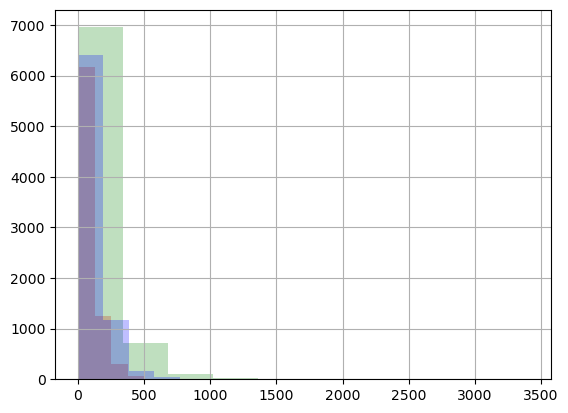

In [7]:
df.protein.hist(color='red', alpha =.25, ls='dashed')
df.carbs.hist(color='green', alpha =.25, ls='dashed')
df.fat.hist(color = 'blue', alpha =.25, ls='dashed')
plt.show()

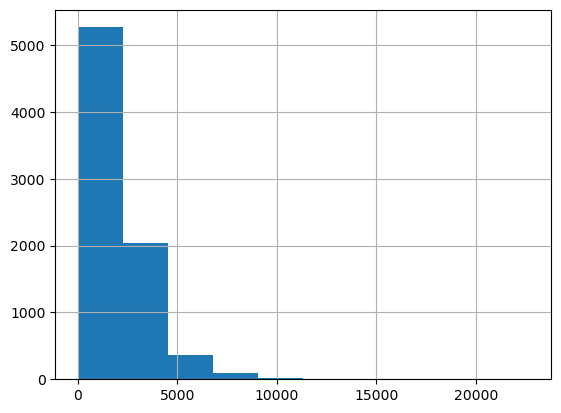

In [8]:
df.calories.hist()
plt.show()

<Axes: >

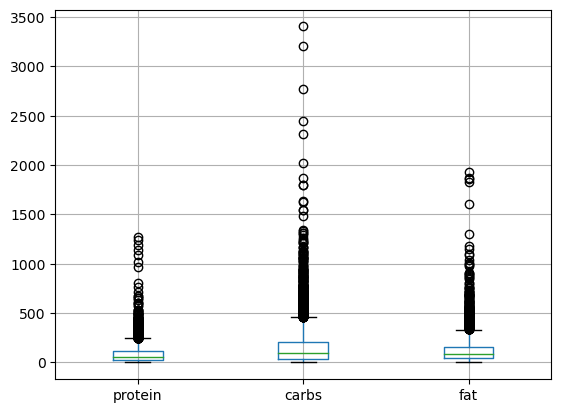

In [9]:
numeric = ['protein', 'carbs', 'fat']
df.boxplot(numeric)

<Axes: >

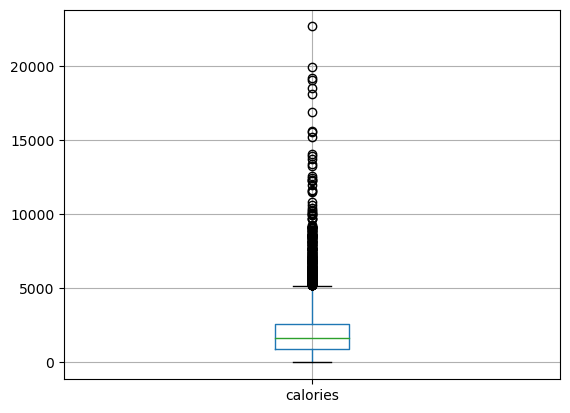

In [10]:
df.boxplot('calories')

In [11]:
proteinmed = df['protein'].median()
proteinstd = df['protein'].std()

proteinoutlier = df[df['protein']>proteinmed+proteinstd]


In [12]:
calmean = df['calories'].mean()
calstd = df['calories'].std()

caloutlier = df[df['calories']>calmean+calstd]
caloutlier

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con,protein_con,carbs_con
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80,11581.80,Very High,Very High,Very High
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01,7111.21,Very High,Very High,Very High
16,paleo,Magic Wings recipes,american,320.76,28.36,252.82,3671.86,Very High,Very High,Low
20,paleo,Chocolate Pecan Pie recipes,american,59.86,567.39,320.76,5395.84,Very High,High,Very High
22,paleo,Chocolate Pecan Pie,american,54.70,503.39,320.12,5113.44,Very High,High,Very High
...,...,...,...,...,...,...,...,...,...,...
7794,dash,Fresh Ginger Cake with Candied Citrus Glaze,american,65.37,787.82,181.09,5042.57,Very High,High,Very High
7796,dash,Pimento Cheese Sandwiches,american,137.16,27.73,516.80,5310.76,Very High,Very High,Low
7799,dash,Neelys Egg Benedict on a Pork Croquette,italian,165.34,209.29,431.44,5381.48,Very High,Very High,Very High
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,3972.14,Very High,Very High,High


In [13]:
df = df[~(df['calories']>calmean+calstd)]
df

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con,protein_con,carbs_con
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84,Low,Low,Low
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2155.94,Very High,Very High,Low
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2204.84,High,Moderate,Very High
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61,Moderate,Low,Moderate
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63,High,Moderate,Moderate
...,...,...,...,...,...,...,...,...,...,...
7798,dash,Manhattan,world,0.03,2.95,0.01,12.01,Low,Low,Low
7800,dash,No Man's Land,world,0.05,15.26,0.03,61.51,Low,Low,Low
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2727.71,Very High,High,Very High
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,1.60,Low,Low,Low


<Axes: >

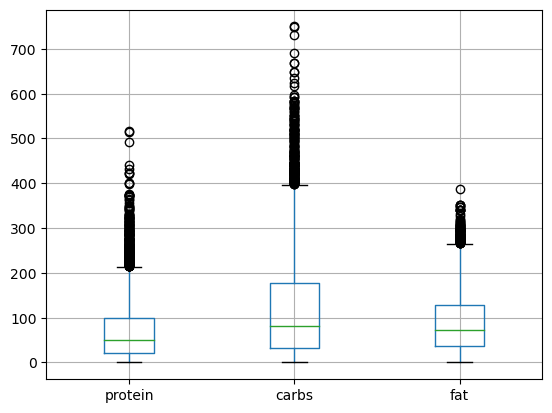

In [14]:
df.boxplot(numeric)

In [15]:
fatmed = df['fat'].median()
fatstd = df['fat'].std()

df = df[df['fat']<=fatmed+(1.5*fatstd)]
df.shape

(6048, 10)

In [16]:
carbmed = df['carbs'].median()
carbstd = df['carbs'].std()

df = df[df['carbs']<= carbmed+(1.5*carbstd)]
df.shape

(5231, 10)

In [17]:
proteinmed = df['protein'].median()
proteinstd = df['protein'].std()

df = df[df['protein']<=proteinmed+(1.5*proteinstd)]
df

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,calories,fat_con,protein_con,carbs_con
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,54.84,Low,Low,Low
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,880.61,Moderate,Low,Moderate
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,1019.63,High,Moderate,Moderate
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44,793.04,Moderate,High,Moderate
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90,729.70,High,Low,Low
...,...,...,...,...,...,...,...,...,...,...
7795,dash,Bloody Mary recipes,world,1.20,6.82,0.43,35.95,Low,Low,Low
7798,dash,Manhattan,world,0.03,2.95,0.01,12.01,Low,Low,Low
7800,dash,No Man's Land,world,0.05,15.26,0.03,61.51,Low,Low,Low
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,1.60,Low,Low,Low


C:\Users\prem\AppData\Local\Temp\ipykernel_9032\2251623306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


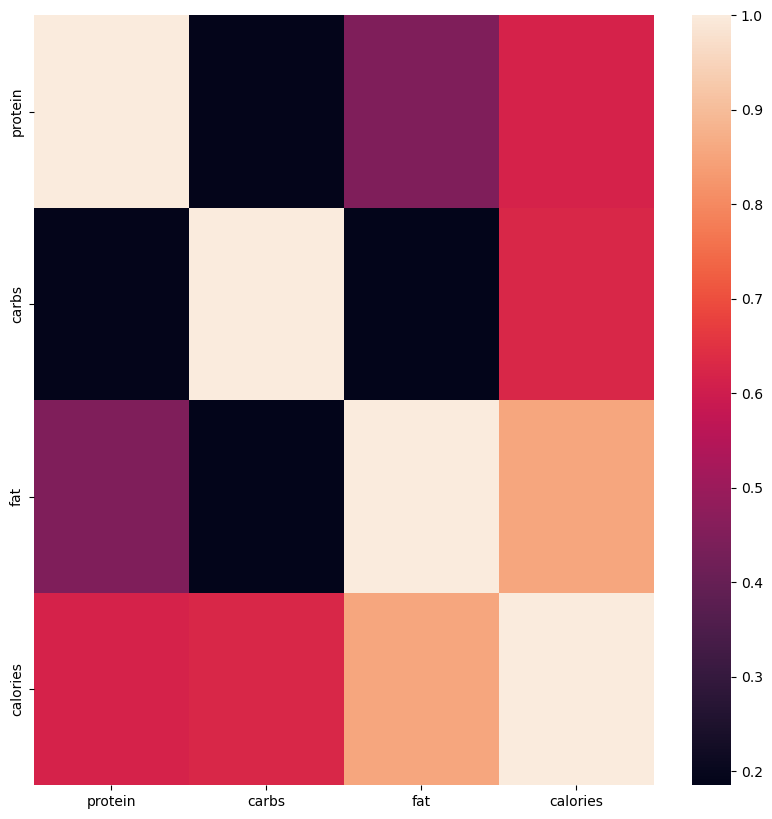

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr());

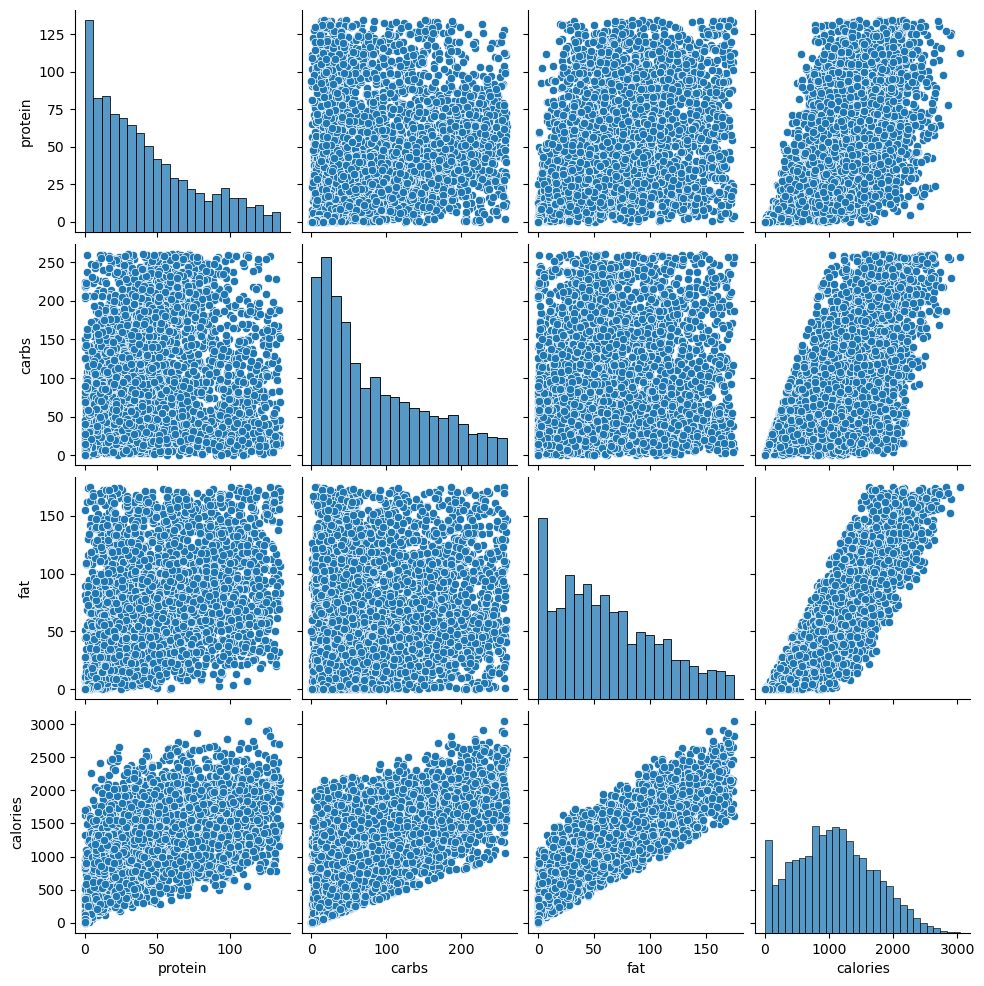

In [19]:
sns.pairplot(df)

In [20]:
df.describe()

,protein,carbs,fat,calories
count,4669.000000,4669.000000,4669.000000,4669.000000
mean,42.787355,85.649465,62.714765,1078.180167
std,35.056643,70.162269,45.594585,613.034834
min,0.000000,0.060000,0.000000,0.240000
25%,13.910000,26.350000,26.900000,615.110000
50%,34.180000,63.530000,55.470000,1056.420000
75%,64.470000,135.450000,94.970000,1505.050000
max,134.660000,260.810000,174.710000,3049.670000


In [21]:
df.to_csv('../data/foodcleaned.csv', index=False)